In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

import fppnpx as fn
from fppnpx.FPPGLM import FPPGLM
from fppnpx.signalfuncs import load_signal, gen_all_channel_signals
from wavemapnpx.WaveMAPClassifier import WaveMAPClassifier

/opt/miniconda3/envs/wavemapspec/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
CUSTOM_PAL_SORT_3 = ['#5e60ce', '#00c49a','#ffca3a','#D81159','#fe7f2d','#7bdff2','#0496ff','#efa6c9','#ced4da', '#1eb43a']
cmap = colormaps.get_cmap('Set1')

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

In [122]:
apath = "/Users/mateouma/Downloads/monkey datasets/TIBERIUS_CHKDLAY_DLPFC_NPIX45_063023_g0/TIBERIUS_CHKDLAY_DLPFC_NPIX45_063023_g0_t0.exported.imec0.lf.bin"
cpath = "/Users/mateouma/Downloads/monkey datasets/cluster_info_task.tsv"
wpath = "/Users/mateouma/Downloads/monkey datasets/20230630_DLPFCwaveforms.mat"

fs = 2500
time_window = [100,123] # seconds within the recording

signal_dataset = load_signal(appath=apath, time_window=time_window, fs=fs, cipath=cpath, wfpath=wpath)
channel_signals = gen_all_channel_signals(signal_dataset, 300, False)

Generated 112 channel signals.


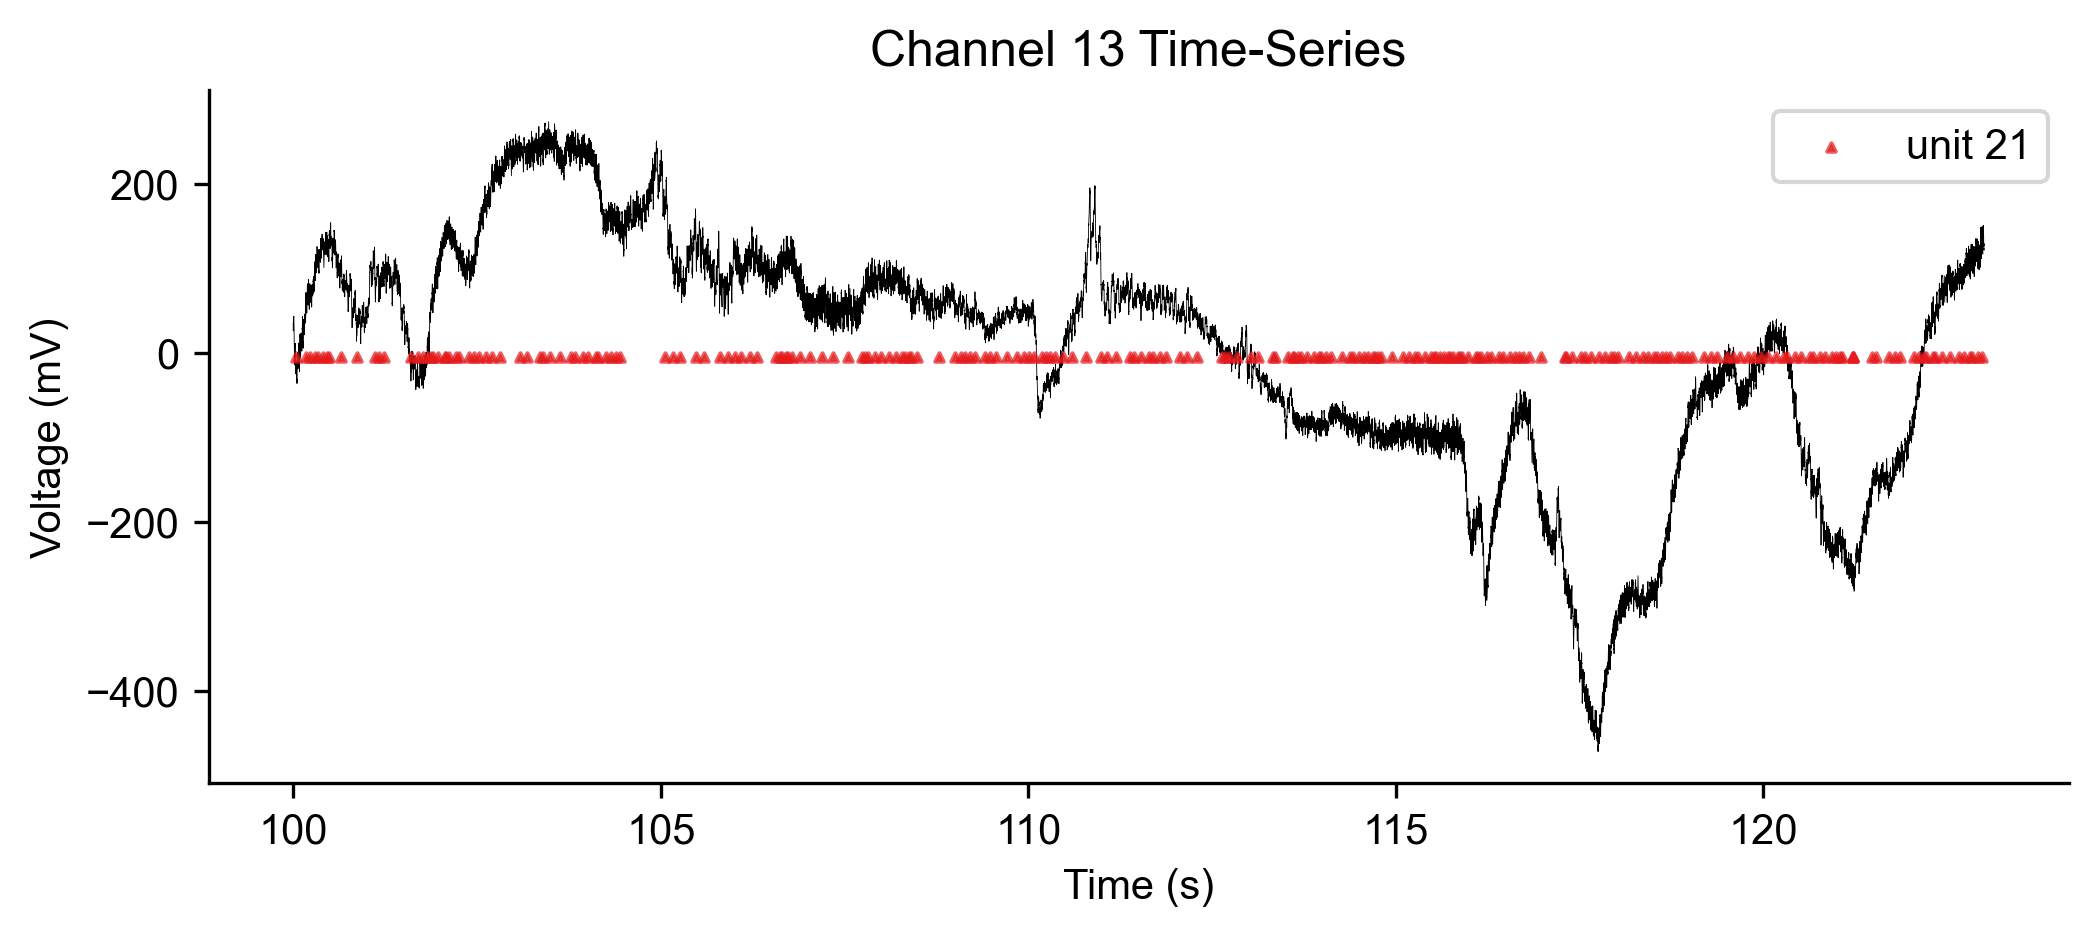

In [123]:
channel_signals['ch13'].plot_signal(spky=-5)
#plt.ylim((-20,20))

In [124]:
ch163_PSD,mt_freqs = fn.spectrafuncs.multitaper_psd(channel_signals['ch163'].time_series, fs=fs, start_time=channel_signals['ch163'].time_axis[0])
ch13_PSD,mt_freqs = fn.spectrafuncs.multitaper_psd(channel_signals['ch13'].time_series, fs=fs, start_time=channel_signals['ch163'].time_axis[0])

Multitaper frequency resolution: 0.2608695652173913
Multitaper number of tapers: 5
Multitaper frequency resolution: 0.2608695652173913
Multitaper number of tapers: 5


In [125]:
from scipy.signal import find_peaks

In [130]:
c13psdpeaks,_ = find_peaks(ch163_PSD, height=100)
c13psdpeaks

array([   7,   14,   18,   20,   26,   28,   31, 1383])

In [132]:
np.linspace(59.7,60.3,10)

array([59.7       , 59.76666667, 59.83333333, 59.9       , 59.96666667,
       60.03333333, 60.1       , 60.16666667, 60.23333333, 60.3       ])

In [131]:
mt_freqs[c13psdpeaks]

array([ 0.30381944,  0.60763889,  0.78125   ,  0.86805556,  1.12847222,
        1.21527778,  1.34548611, 60.02604167])

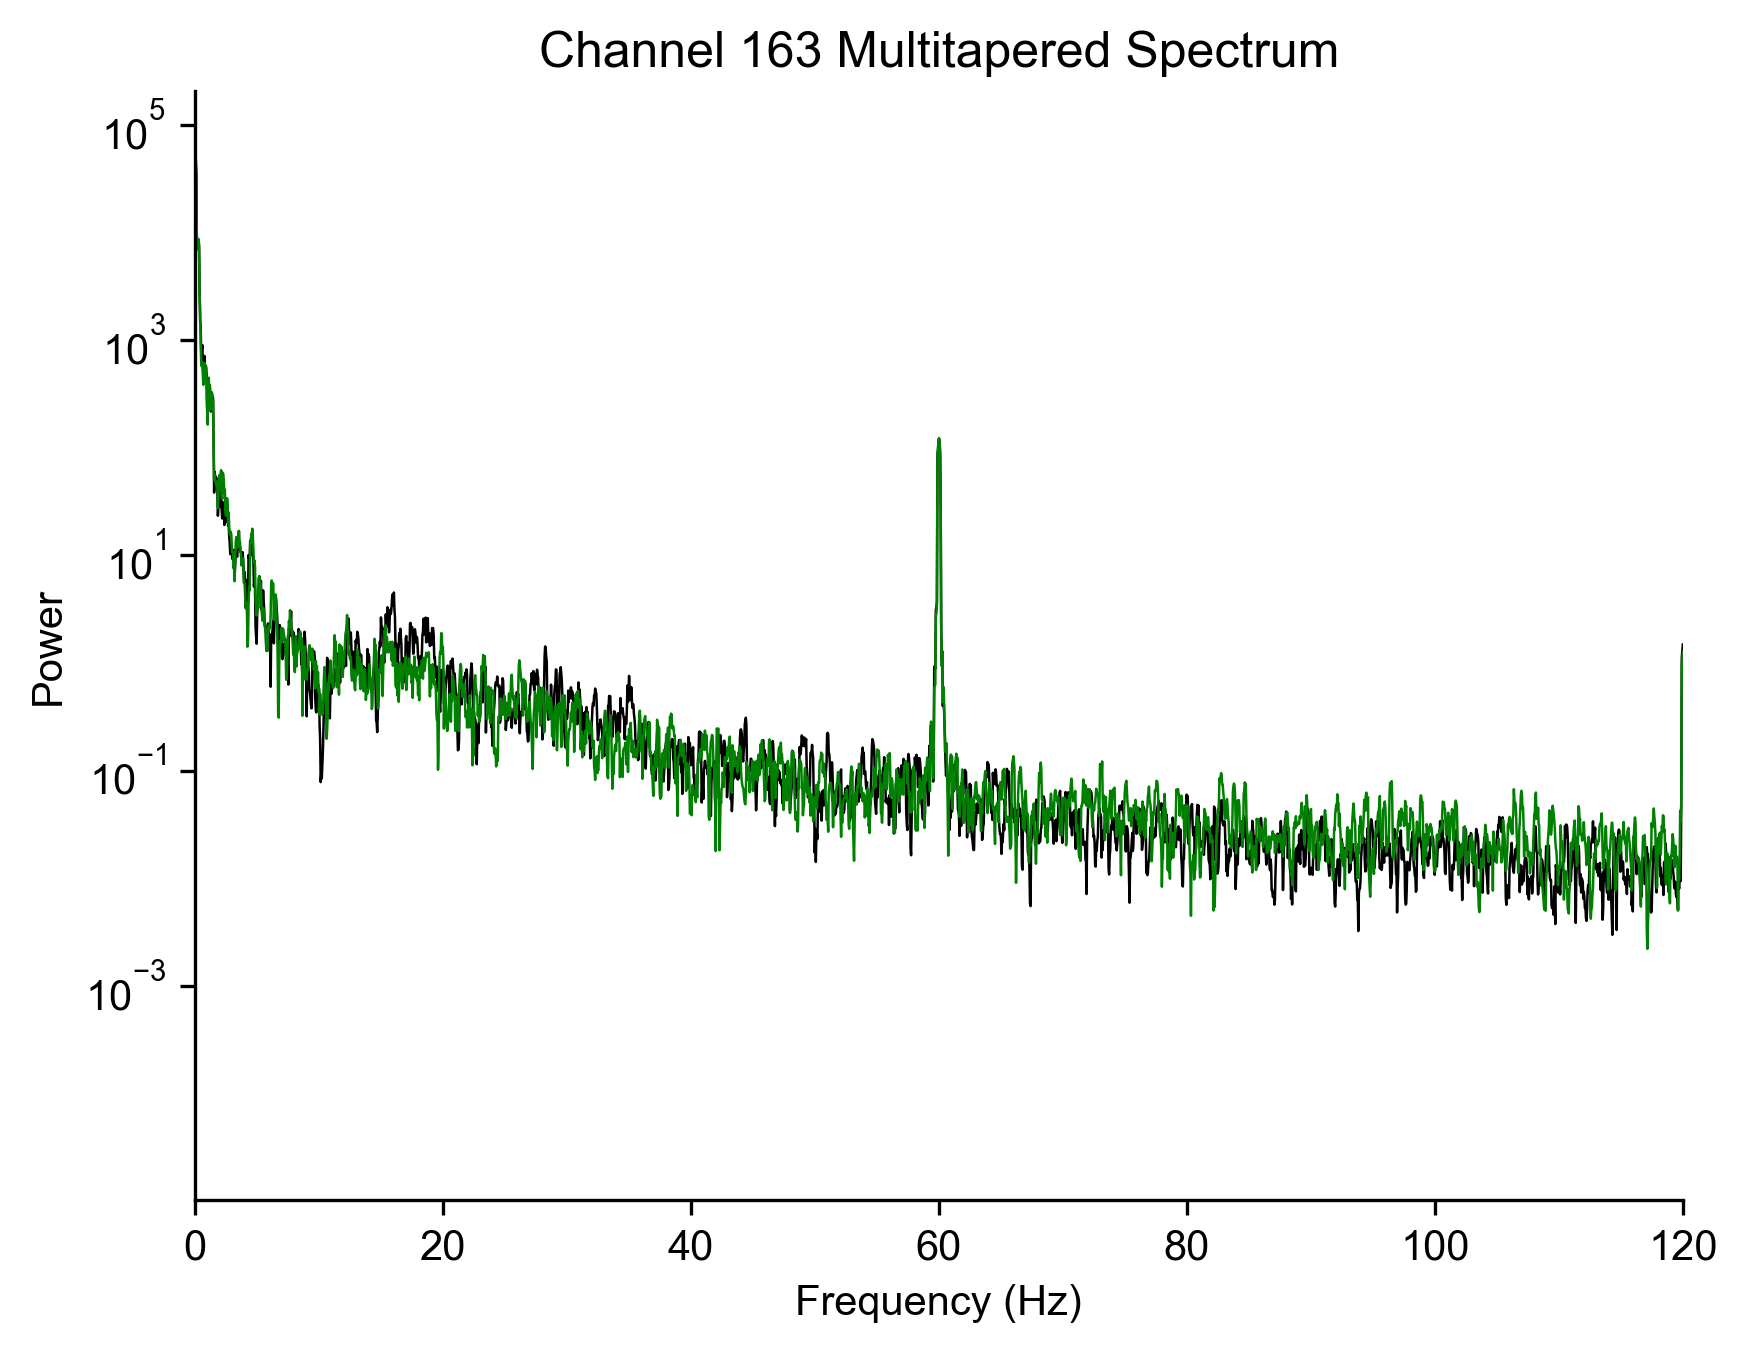

In [129]:
plt.figure(dpi=300)
plt.semilogy(mt_freqs, ch13_PSD, color='k', linewidth=0.6)
plt.semilogy(mt_freqs, ch163_PSD, color='g', linewidth=0.6)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.title("Channel 163 Multitapered Spectrum")
plt.xlim((0,120))
plt.show()

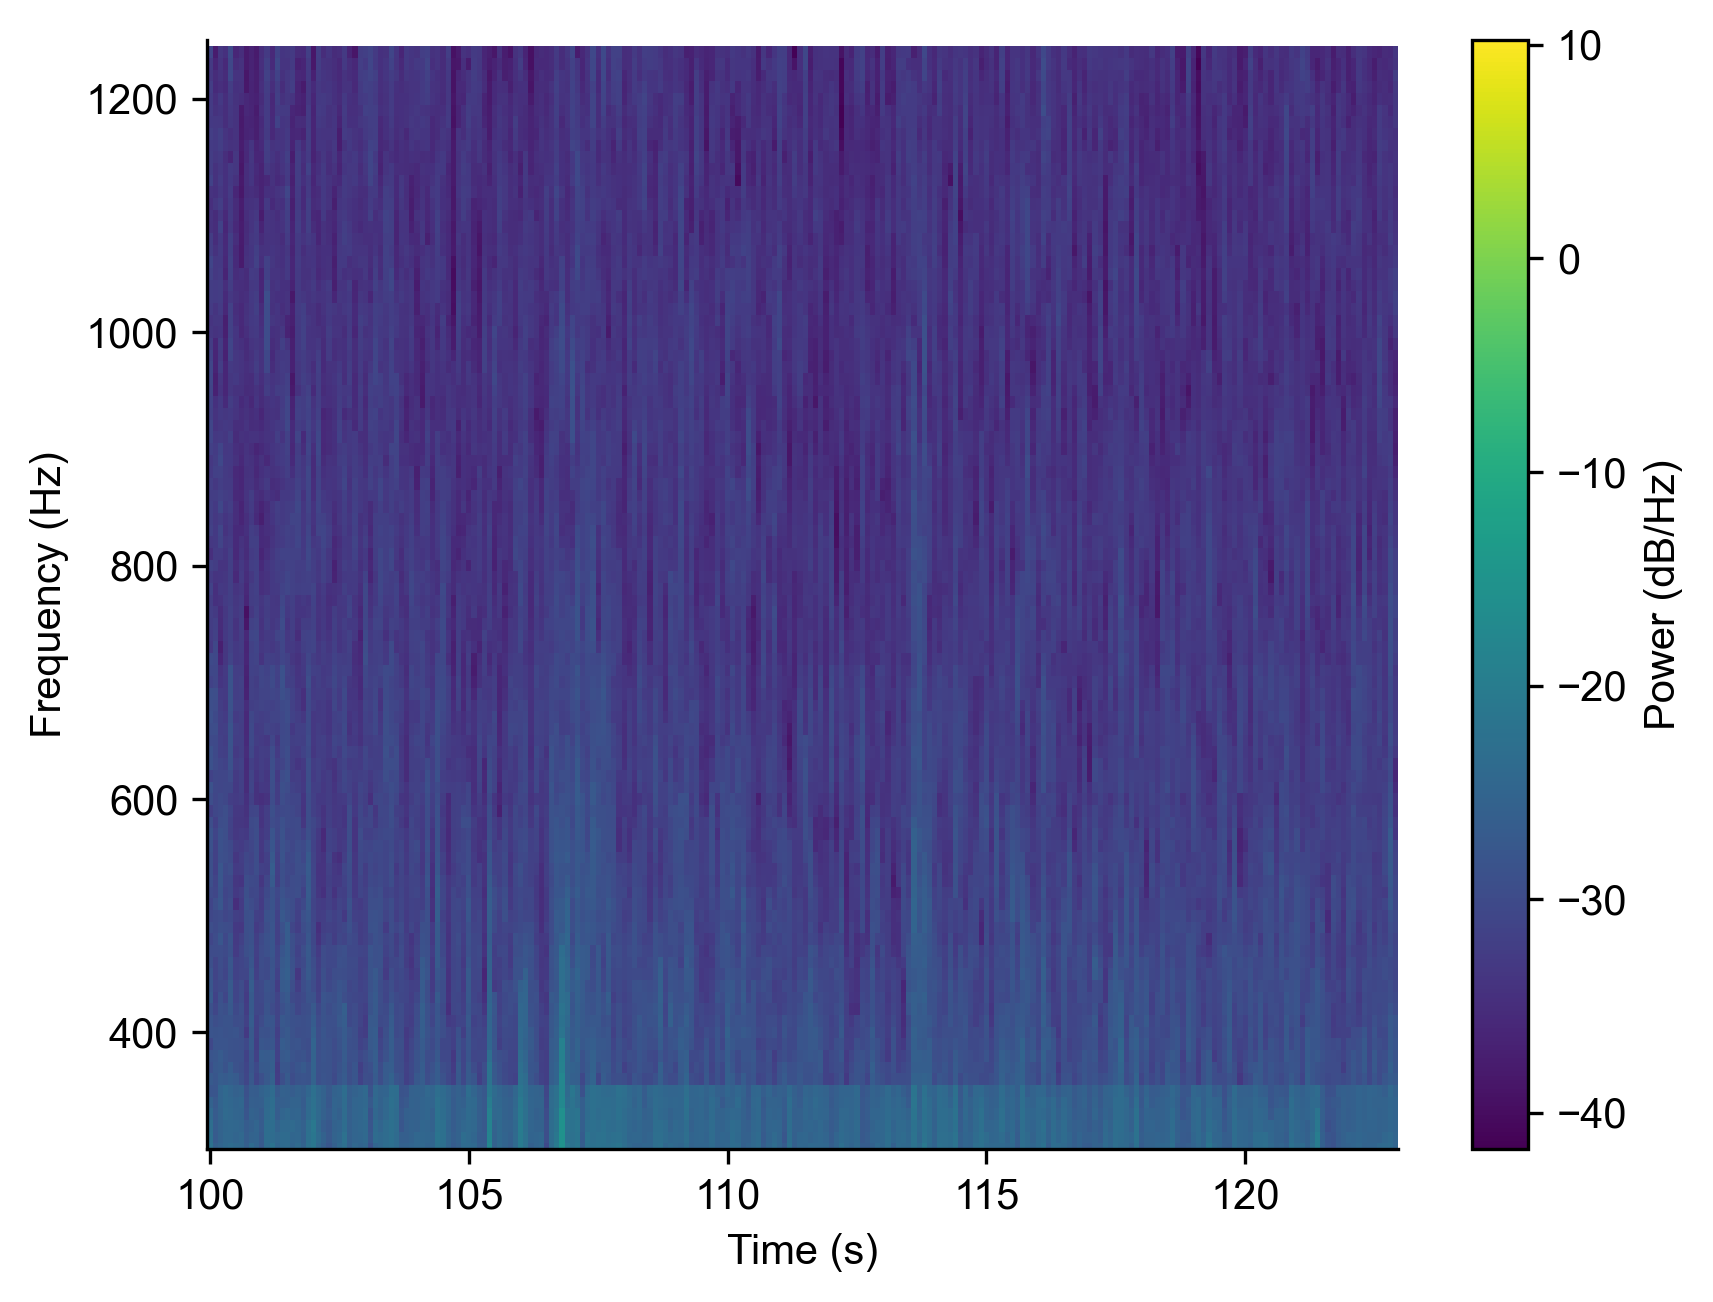

In [72]:
fn.spectrafuncs.plot_spectrogram(channel_signals['ch13'].time_series, fs, time_halfbandwidth_product=5.75,
                                 window_duration=0.1,
                                 window_step=0.1,
                                 start_time=channel_signals['ch13'].time_axis[0], ymin=300, ymax=1250)

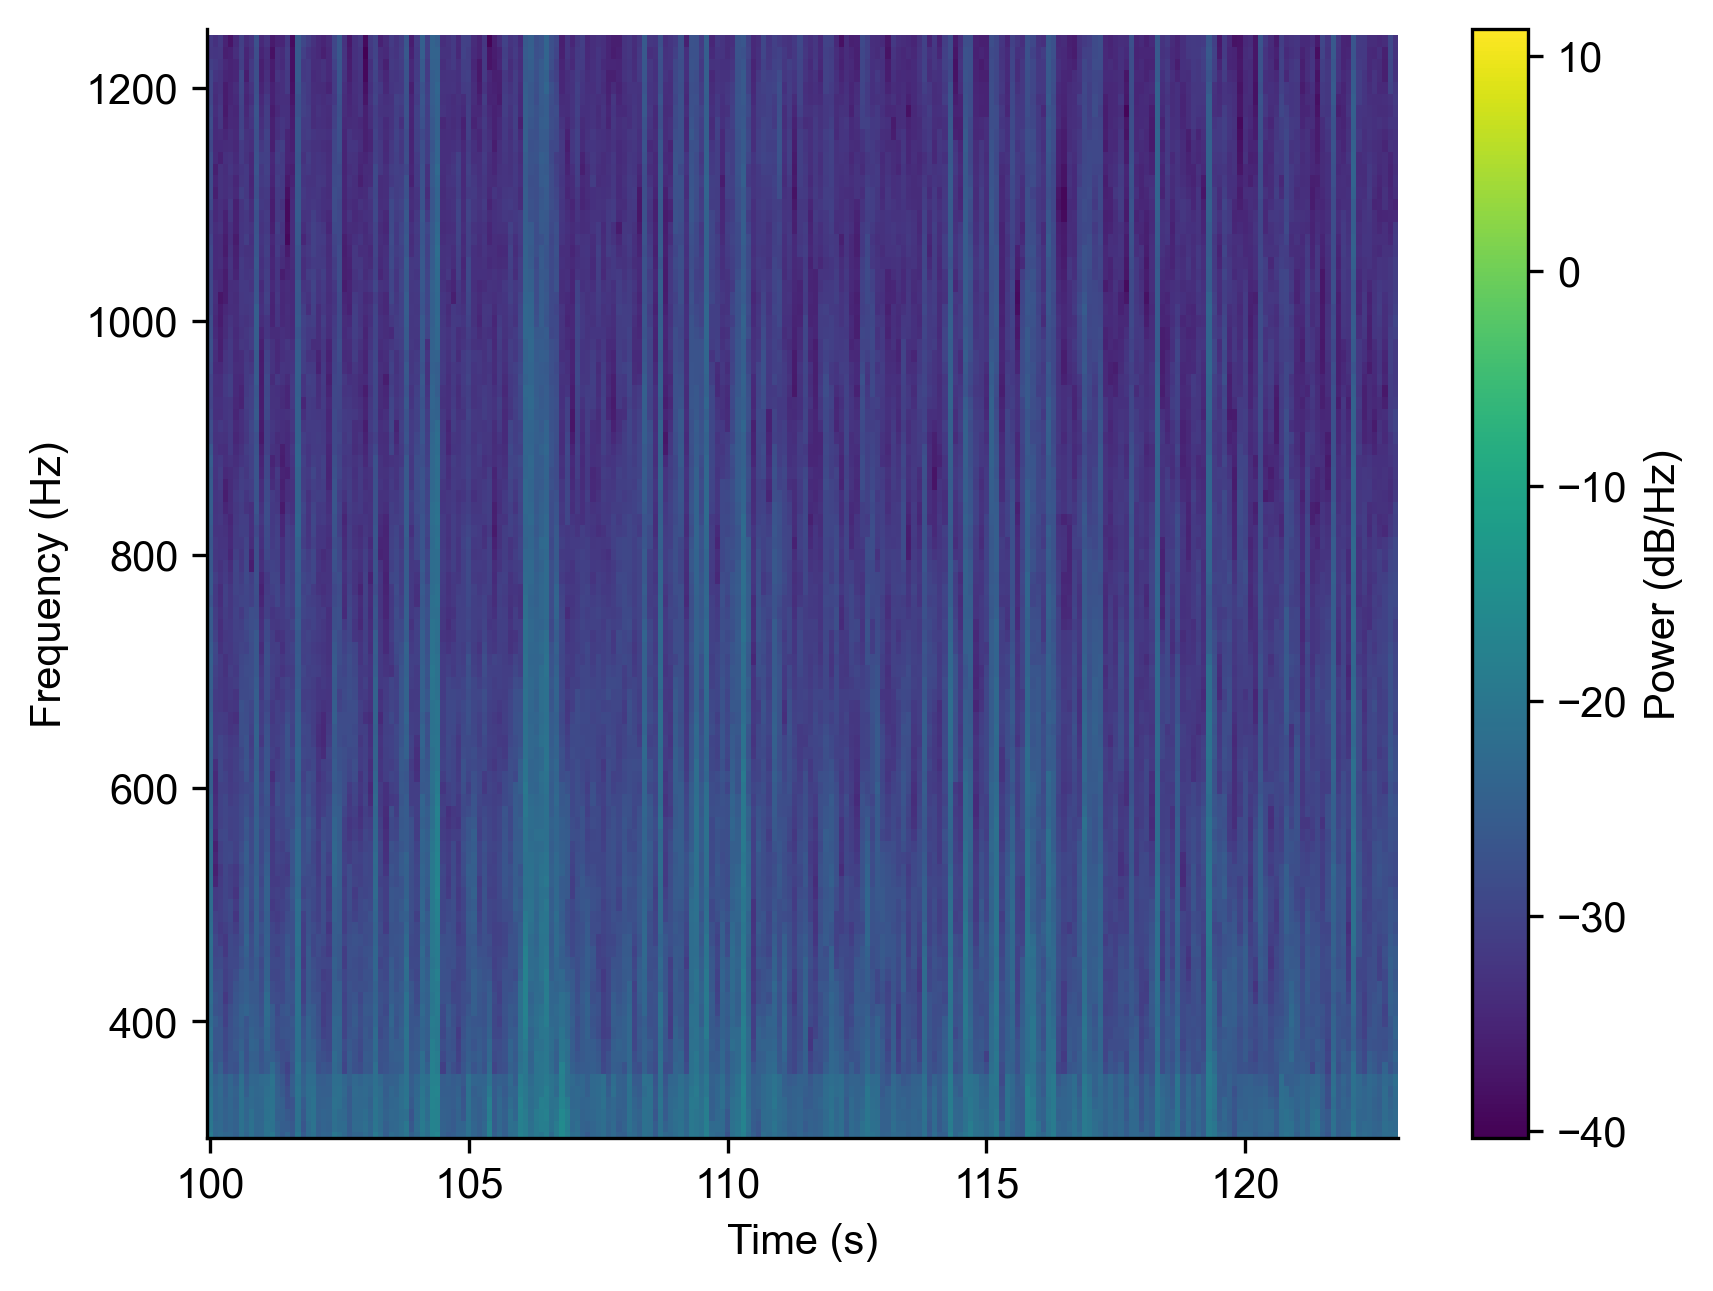

In [74]:
fn.spectrafuncs.plot_spectrogram(channel_signals['ch163'].time_series, fs, time_halfbandwidth_product=5.75,
                                 window_duration=0.1,
                                 window_step=0.1,
                                 start_time=channel_signals['ch13'].time_axis[0], ymin=300, ymax=1250)

In [75]:
channel_signals['ch163'].firing_rates

{296: 3.9130434782608696}